# Califonia Housing

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Split in training and test dataframe

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(california_housing.frame, test_size = 0.2)

In [8]:
df_train.shape

(16512, 9)

In [9]:
df_test.shape

(4128, 9)

### Preparation - Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

scaler.fit(df_train_features)

StandardScaler()

In [66]:
df_train_features_scaled = pd.DataFrame(scaler.transform(df_train_features), columns = features_names)
df_test_features_scaled = pd.DataFrame(scaler.transform(df_test_features), columns = features_names)

In [68]:
df_train_features_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.414837,0.584082,-0.113992,-0.127299,-0.778424,-0.038673,-0.820043,0.724279
1,-0.830378,0.107511,-0.769866,-0.029189,-0.001034,-0.048747,-0.754547,0.544858
2,0.524902,-1.004486,-0.232912,-0.049119,-1.117861,-0.140566,-0.946356,0.918651
3,-0.418477,1.854936,-0.081549,0.197962,-0.936052,-0.103955,-1.348688,1.197750
4,-0.413149,0.028083,-0.268671,-0.167785,1.206250,-0.036581,0.499232,-1.035040


In [69]:
df_test_features_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.593104,0.584082,0.244419,-0.072952,-0.035963,-0.006430,-0.829399,0.729263
1,-1.627753,-1.481057,-0.672987,-0.028518,-0.447048,0.024364,0.326136,0.146146
2,-0.250742,-0.130774,-0.149027,-0.113712,1.853777,0.023614,-0.735834,0.714311
3,-0.748778,0.345796,-0.526027,-0.300101,-0.051188,-0.018859,-0.726477,0.963506
4,-0.805903,-1.322200,-0.693201,-0.201767,-0.095073,-0.066294,0.555371,-0.068162


### Multiple Linear Regression

In [11]:
target_name = df_train.columns[-1]
features_names = [column for column in df_train.columns if  column != target_name]

print('Target:', target_name)
print('Features:', features_names)

Target: MedHouseVal
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
df_train_features = df_train[features_names]
df_train_target = df_train[target_name]

df_test_features = df_test[features_names]
df_test_target = df_test[target_name]

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df_train_features, df_train_target)

LinearRegression()

In [45]:
y_predicted = model.predict(df_test_features)

In [46]:
y_predicted

array([2.6520232 , 0.29488437, 1.87610376, ..., 1.75585591, 1.80919238,
       2.17123509])

In [47]:
df_test['Predicted with Linear Regression'] = y_predicted

In [48]:
df_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Predicted with Linear Regression,Predicted with Ridge Regularization
8009,4.9904,36.0,6.004367,1.063319,1386.0,3.026201,33.86,-118.11,2.217,2.652023,2.652097
19880,0.7800,10.0,3.835766,1.083942,927.0,3.383212,36.33,-119.28,0.555,0.294884,0.294883
6862,3.3906,27.0,5.074324,1.044402,3496.0,3.374517,34.06,-118.14,2.372,1.876104,1.876182
13299,2.4464,33.0,4.183158,0.957895,1369.0,2.882105,34.08,-117.64,1.226,1.351589,1.351689
2325,2.3381,12.0,3.787986,1.003534,1320.0,2.332155,36.82,-119.71,1.125,0.937009,0.936902
...,...,...,...,...,...,...,...,...,...,...,...
18045,3.1176,33.0,4.293413,1.119760,1511.0,1.809581,37.23,-121.98,3.963,2.294773,2.294528
1803,4.2895,4.0,4.004213,1.120787,1285.0,1.804775,37.91,-122.35,1.868,2.456238,2.455711
14230,3.0200,9.0,4.126812,1.038647,2521.0,3.044686,32.69,-117.04,1.589,1.755856,1.755730
1936,5.5840,13.0,7.302128,1.097872,1286.0,2.736170,38.67,-120.98,1.866,1.809192,1.809386


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(df_test_target.values, y_predicted)

0.6094618392691014

In [51]:
r2_score(df_train_target.values, model.predict(df_train_features))

0.6050703330082843

In [52]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.44
HouseAge        :   0.01
AveRooms        :  -0.12
AveBedrms       :   0.64
Population      :  -0.00
AveOccup        :  -0.00
Latitude        :  -0.42
Longitude       :  -0.43


### Ridge Regression

In [119]:
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(df_train_features_scaled, df_train_target)

Ridge()

In [120]:
y_predicted = model.predict(df_test_features_scaled)

In [121]:
df_test['Predicted with Ridge Regularization Scaled'] = y_predicted

In [122]:
r2_score(df_test_target.values, y_predicted)

0.6094578151553987

In [123]:
model.coef_

array([ 0.83633826,  0.11591778, -0.2719    ,  0.29776854, -0.00568798,
       -0.04006028, -0.88737523, -0.85991726])

In [124]:
features_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [125]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.84
HouseAge        :   0.12
AveRooms        :  -0.27
AveBedrms       :   0.30
Population      :  -0.01
AveOccup        :  -0.04
Latitude        :  -0.89
Longitude       :  -0.86


### With scaled features

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df_train_features_scaled, df_train_target)

LinearRegression()

In [71]:
y_predicted = model.predict(df_test_features_scaled)

In [72]:
df_test['Predicted with Linear Regression Scaled'] = y_predicted

In [73]:
r2_score(df_test_target.values, y_predicted)

0.6094618392691015

In [74]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.84
HouseAge        :   0.12
AveRooms        :  -0.27
AveBedrms       :   0.30
Population      :  -0.01
AveOccup        :  -0.04
Latitude        :  -0.89
Longitude       :  -0.86


### Lasso Regularization

In [106]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.05)

model.fit(df_train_features_scaled, df_train_target)

Lasso(alpha=0.05)

In [107]:
y_predicted = model.predict(df_test_features_scaled)

In [112]:
df_test['Predicted with Ridge Regularization'] = y_predicted

In [113]:
r2_score(df_test_target.values, y_predicted)

0.5479961324862506

In [110]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.74
HouseAge        :   0.14
AveRooms        :  -0.00
AveBedrms       :   0.00
Population      :   0.00
AveOccup        :  -0.00
Latitude        :  -0.26
Longitude       :  -0.22


### Plot with Latitude and Longitude

<Axes: xlabel='Longitude', ylabel='Latitude'>

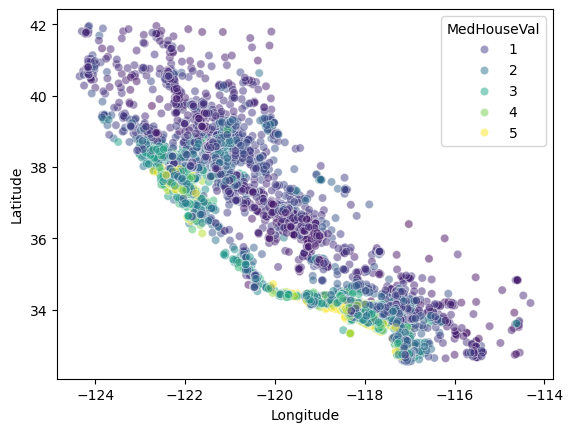

In [118]:
sns.scatterplot(data=df_train, 
                x='Longitude', 
                y='Latitude', 
                hue='MedHouseVal',
                palette='viridis',
                alpha=0.5,)

### Feature selection

In [132]:
features_names = ['MedInc','Latitude','Longitude','HouseAge','AveRooms','AveBedrms']

print('Target:', target_name)
print('Features:', features_names)

Target: MedHouseVal
Features: ['MedInc', 'Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'AveBedrms']


In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df_train_features_scaled[features_names], df_train_target)

y_predicted = model.predict(df_test_features_scaled[features_names])

In [134]:
r2_score(df_test_target.values, y_predicted)

0.6086107870695264

In [135]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.83
Latitude        :  -0.89
Longitude       :  -0.86
HouseAge        :   0.12
AveRooms        :  -0.27
AveBedrms       :   0.30


In [139]:
features_names = ['MedInc','Latitude','Longitude','HouseAge']

print('Target:', target_name)
print('Features:', features_names)

Target: MedHouseVal
Features: ['MedInc', 'Latitude', 'Longitude', 'HouseAge']


In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df_train_features_scaled[features_names], df_train_target)

y_predicted = model.predict(df_test_features_scaled[features_names])

In [147]:
r2_score(df_test_target.values, y_predicted)

0.5975134535781998

In [145]:
for k, v in dict(zip(features_names, model.coef_)).items():
    print(f'{k:16}: {v:6.2f}')

MedInc          :   0.72
Latitude        :  -0.95
Longitude       :  -0.91
HouseAge        :   0.12
